In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from time import time
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load the dataset
file_path = 'C:/Users/Asus/Desktop/data Cleaning/train.csv'
df = pd.read_csv(file_path, encoding='ascii')

df['Age'].fillna(df['Age'].mean(), inplace=True)

df = pd.get_dummies(df, columns=['Sex'], drop_first=True)


targets = ['Pclass', 'Sex_male', 'Age', 'Fare']
X = df[targets]
y = df['Survived']

# Standardizing the features
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=0.95) # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initializing the Logistic Regression model
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Accuracy: ', accuracy)
print('Confusion Matrix:\
', conf_matrix)
print('Classification Report:\
', class_report)

print(f'Predictions: \n{y_pred}')

testdf = pd.read_csv('C:/Users/Asus/Desktop/data Cleaning/test.csv')
actualdf = pd.read_csv('C:/Users/Asus/Desktop/data Cleaning/gender_submission.csv')

testdf['Age'].fillna(testdf['Age'].mean(), inplace=True)
testdf['Fare'].fillna(testdf['Fare'].mean(), inplace=True)

testdf = pd.get_dummies(testdf, columns=['Sex'], drop_first=True)
print(testdf[['PassengerId', 'Sex_male']])

targets = ['Pclass', 'Sex_male', 'Age', 'Fare']

actuals = actualdf['Survived']

X_test_scaled = scaler.transform(testdf[targets])
X_test_pca = pca.transform(X_test_scaled)

#get predictions on the testing dataset
test_predictions = model.predict(X_test_pca)
accuracy_test = accuracy_score(actuals, test_predictions)

print(f'Trainset Accuracy: {accuracy}')
print(f'Testset Accuracy: {accuracy_test}')
print(f'Predictions: \n{test_predictions}')

Accuracy:  0.7988826815642458
Confusion Matrix: [[90 15]
 [21 53]]
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Predictions: 
[0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1]
     PassengerId  Sex_male
0            892      True
1            893     False
2            894      True
3            895      True
4            896     False
..           ...       ...
413         1305

C:\Users\Asus\AppData\Local\Temp\ipykernel_8400\1575289046.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_8400\1575289046.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [12]:
pred_results = pd.DataFrame({'PassengerId': testdf['PassengerId'], 'Name': testdf['Name'], 'Age': testdf['Age'], 'Pclass': testdf['Pclass'], 'Sex': testdf['Sex_male'], 'Survived': test_predictions})
pred_results['Sex'] = pred_results['Sex'].map({True: 'Male', False: 'Female'})
pred_results.to_csv('C:/Users/Asus/Desktop/data Cleaning/titanic_predictions.csv', index=False)


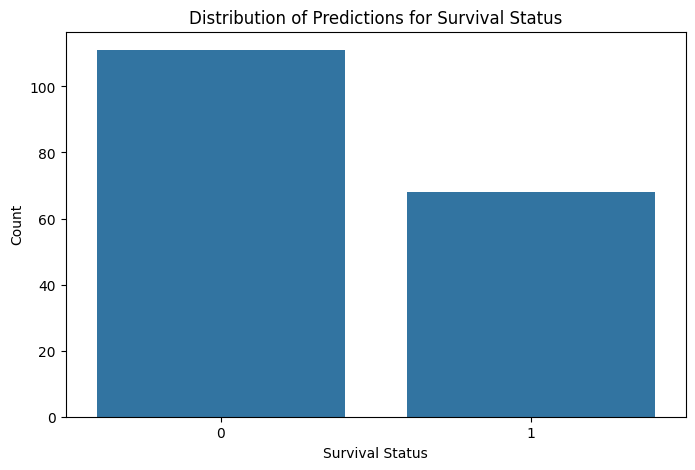

In [13]:
# Distribution of predictions for survival status
plt.figure(figsize=(8, 5))
sns.countplot(x=y_pred)
plt.title('Distribution of Predictions for Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.show()

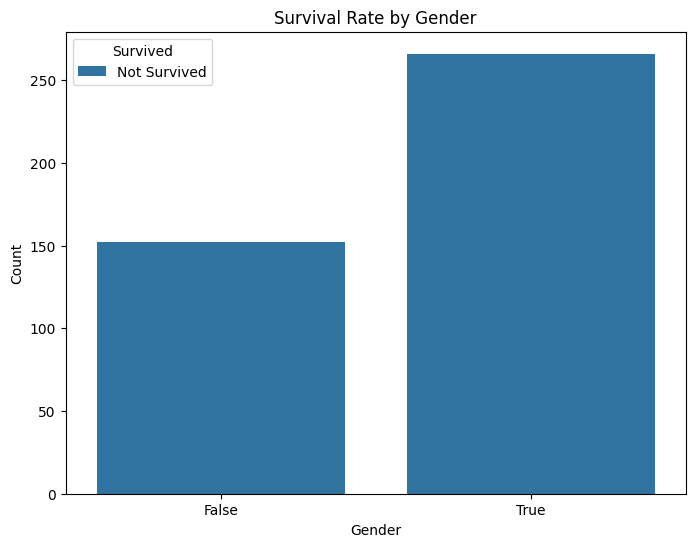

In [19]:
# Survival rate by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex_male', data=testdf)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()


In [33]:
# Separate data for not survived and survived
not_survived_data = testdf[testdf['Survived'] == 0]
survived_data = testdf[testdf['Survived'] == 1]

# Survival rate by Age (assuming age is in discrete bins)
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', data=not_survived_data, bins=30, color='skyblue', label='Not Survived', alpha=0.7)
sns.histplot(x='Age', data=survived_data, bins=30, color='orange', label='Survived', alpha=0.7)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

KeyError: 'Survived'

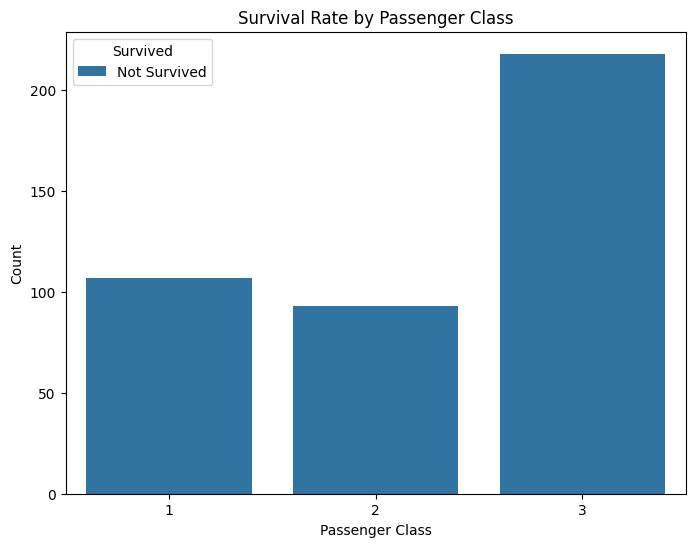

In [22]:
# Survival rate by Passenger Class
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=testdf)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

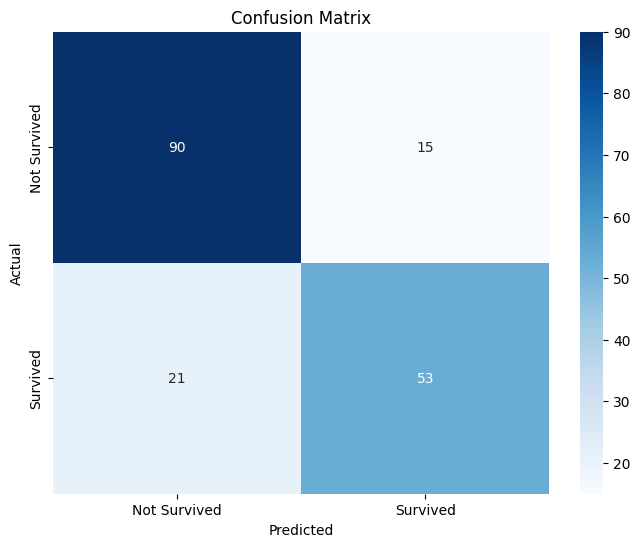

In [23]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

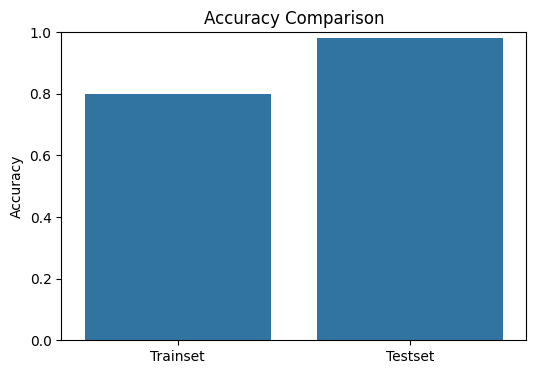

In [24]:
# Accuracy
plt.figure(figsize=(6, 4))
sns.barplot(x=['Trainset', 'Testset'], y=[accuracy, accuracy_test])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.show()